In [9]:
import numpy
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import ndimage
import math
from matplotlib.pyplot import *
import matplotlib.image as mpimg
import imageio
import PIL.Image
import cv2

In [10]:

def GaussianFilter(rows, cols, sigma, highPass=True):
    x = int(rows/2) + 1 if rows % 2 == 1 else int(rows/2)
    y = int(cols/2) + 1 if cols % 2 == 1 else int(cols/2)

    def gaussian(i,j):
        coeff = math.exp(-1.0 * ((i - x)**2 + (j - y)**2) / (2 * sigma**2))
        return 1 - coeff if highPass else coeff

    return numpy.array([[gaussian(i,j) for j in range(cols)] for i in range(rows)])
def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return ifft2(ifftshift(filteredDFT))

In [11]:
def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, GaussianFilter(n, m, sigma, highPass=False))
def highPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, GaussianFilter(n, m, sigma, highPass=True))

def hybridImage(highFreqImg, lowFreqImg, sigHigh, sigLow):
    highPassimg = highPass(highFreqImg, sigHigh)
    lowPassimg = lowPass(lowFreqImg, sigLow)
    return highPassimg + lowPassimg


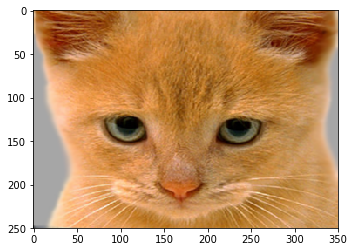

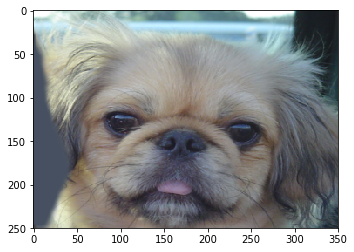

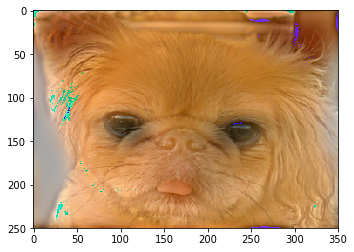

In [13]:
img1 = mpimg.imread("cat.bmp")
img1=cv2.resize(img1,(350,250))
#print(img1.shape)
figure()
matplotlib.pyplot.imshow(img1)
img2 = mpimg.imread("dog.bmp")
img2=cv2.resize(img2,(350,250))
figure()
matplotlib.pyplot.imshow(img2)

if img1.shape[2] or img2.shape[2]:
    red_img1 = img1[:,:,0] #single R channel for image1
    green_img1 = img1[:,:,1] #single G channel for image1
    blue_img1 = img1[:,:,2] #single B channel for image1
    
    red_img2 = img2[:,:,0] #single R channel for image1
    green_img2 = img2[:,:,1] #single G channel for image1
    blue_img2 = img2[:,:,2] #single B channel for image1

    hybrid_red = hybridImage(red_img2, red_img1, 10, 5) #hybrid image in R channel
    hybrid_green = hybridImage(green_img2, green_img1, 10, 5) #hybrid image in R channel
    hybrid_blue = hybridImage(blue_img2, blue_img1, 10, 5) #hybrid image in R channel

    # combining R,G,B channels
    img1[:,:,0] = numpy.real(hybrid_red)
    img1[:,:,1] = numpy.real(hybrid_green)
    img1[:,:,2] = numpy.real(hybrid_blue)
    figure()
    matplotlib.pyplot.imshow(img1)
    
else:
    hybrid = numpy.real(hybridImage(img2, img1, 10, 5))  #for grayscale images
    matplotlib.pyplot.imshow(hybrid)
    
    